# Resampling methods

# I. Imbalanced datasets

For customer churn, as well as for many other problems, datasets might be **imbalanced**.

Imbalanced datasets need a special treatment.

## I.1. Reminder: Imbalanced data and the accuracy paradox

Let's start with an example. Imagine a rare disease that occurs only for 2 over 100 tested patients. We have a set of features to predict whether a patient is infected or not.

This is a basic binary classification problem with the following data:
- class 0: the patient is not infected (98% of the whole dataset)
- class 1: the patient is infected (2% of the whole dataset)

Therefore, a machine learning model that **always** predicts **class 0** would have an **accuracy of 98%** 😱.

>⚠️ This is called the **accuracy paradox**: with highly **imbalanced dataset** (i.e. most of the samples belong to the same class), the accuracy is not a good evaluation metric.

What can we use? What other metrics do we know?

## I.2. Reminder : Performance measurement with imbalanced dataset

Well, we also know the following metrics:
- Precision
- Recall
- F1-score
- ROC
- ROC AUC

➡️ Let's see how these metrics would work on our example :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1l9qPad4Cngz2EO7ODykHvfgjsbY1hxU0">
</p>

- **Accuracy:**

$$Accuracy = \frac{TP + TN}{TP + TN + FN + FP} = \frac{980}{1000} = \text{98% (too good = irrelevant ? 👎)}$$

- **Precision**

$$Precision = \frac{TP}{TP + FP} = \frac{1}{12} = \text{8.3%  (not good 👎)}$$  

- **Recall**

$$Recall = \frac{TP}{P} = \frac{TP}{TP + FN} = \frac{1}{10} = \text{10%  (not good either 👎)}$$  

- **F1-score**

$$F1\_score = \frac{2 * (Precision * Recall)}{Precision + Recall} = \frac{1.66}{0.183} = \text{9.1%  (not good either 👎)}$$  

> ⚠️What do you think about this model? Even with an accuracy of 98%, would you use it in real life?

- **ROC Curve** and **ROC AUC score** : it is not very relevant on this very simple dataset because we only have one point to plot (*see plot below* 👇🏻)

➡️ Just as a reminder, we can compute all those metrics using **`sklearn`**:

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

# recreate the dataset above
y_true = np.zeros(1000)
y_true[-10:]=1
y_pred = np.zeros(1000)
y_pred[:11]=1
y_pred[-1:] = 1

# compute the scores
print('accuracy:', accuracy_score(y_true, y_pred))
print('precision:', precision_score(y_true, y_pred))
print('recall:', recall_score(y_true, y_pred))
print('F1-score:', f1_score(y_true, y_pred))
print('ROC AUC score:', roc_auc_score(y_true, y_pred))

# Or directly with a classification report
print()
print("Classification report")
print(classification_report(y_true, y_pred))


accuracy: 0.98
precision: 0.08333333333333333
recall: 0.1
F1-score: 0.0909090909090909
ROC AUC score: 0.5444444444444445

Classification report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       990
         1.0       0.08      0.10      0.09        10

    accuracy                           0.98      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.98      0.98      0.98      1000



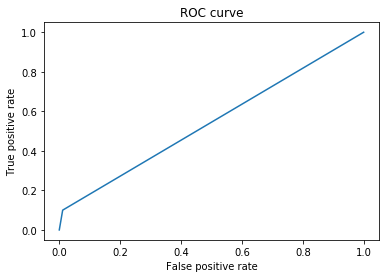

In [2]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

# II. Undersampling

The first possible approach is to undersample the initial dataset : we keep **all the observations from underrepresented class** (here *infected*) and only **a subsample of the overrepresented class**.


➡️ Let's look again at our example.

- Initially, we only have $\frac{10}{1000} = 1\%$ of infected samples.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1km6oDS-w_n619uh95oHR93VxFuz7DuTl">
</p>

- We apply a **Random Undersampling** : we keep the 10 infected samples and select randomly 90 not infected samples.
 
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1kf4FeJvjFJ6-rz3n-KBtrF12-bV2RRIs">
</p>
 
- We now have $\frac{10}{100} = 10\%$ of infected samples:  our dataset is **much less imbalanced** !

> ⚠️ The drawback is that we **loose many potentially useful samples** and we **may not keep the original distribution shape** of our data.

###  Implementation with `imblearn`
This method can be applied using the **`imbalanced-learn`** library. If needed, you can install it with :
```bash
conda install imbalanced-learn
```

In particular, you may use the following class:

```python
class imblearn.under_sampling.RandomUnderSampler(sampling_strategy='auto', return_indices=False, random_state=None, replacement=False, ratio=None)
```

You can find an example and more details about undersampling implementation [on the Imbalanced Learn website](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html).

## III. Oversampling

## III.1. Random oversampling

This is the exact opposite approach : instead of removing some overrepresented class samples (here *not infected*), we would **artificially add some underrepresented class samples** (here *infected*).
- The **most naive way** of doing this would be to **duplicate underrepresented labels**. For example in our example you would duplicate the 10 *infected* samples 10 times, thus having 100 *infected* labels. This technique has drawbacks, it does not create new information and **may lead to overfitting on the duplicated data**.

## III.2. SMOTE

- A **smarter way** of oversampling is the *Synthetic Minority Oversampling Technique* (SMOTE). 

The idea is to **create new samples** using a **`k-NN`** on original data. To do so, a new sample $x_{new}$ will be computed based on the *k* nearest neighboors of an already existing sample $x_i$ with the following formula:

$$
x_{new} = x_i + \lambda \times (x_{zi} - x_i)
$$

Where:
- $x_{zi}$ is one of the $k$ nearest neighboors of $x_i$ 
- $\lambda$ is a random value between 0 and 1

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1S7iiSzQxlajEPPRX_rwgf-TKeeT4uGmt">
</p>

### Implementation with `imblearn`

SMOTE can also be computed using the **`imbalanced-learn`** library, with the following class:

```python
class imblearn.over_sampling.SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated', out_step='deprecated', kind='deprecated', svm_estimator='deprecated', n_jobs=1, ratio=None)
```

You can see great examples and implementations [on the Imbalanced Learn website](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#a-practical-guide).

## IV. More advanced techniques

Just for information, there are other more advanced techniques, we will just mention some of them here :
* Ensemble learning with different resampled data and always keeping the underrepresented class
* Clustering the overrepresented class and keep only the clusters centers